In [20]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd

In [191]:
def R_pwb(bef, af):
    bef_result = []
    af_result = []
    bef_data = []
    af_data = []
    bef_ref = []
    af_ref = []
    t = []
    scale_factor = [1.254, 1, 0.645, 1.514]
    rad = 3.42 * pow(10,-3)
    for i in range(4):
        hdu = fits.open(bef[i])[0]
        header = hdu.header
        data = hdu.data
        bef_data.append(data)
        t.append(header["EXP_0"])
        hdu = fits.open(af[i])[0]
        header = hdu.header
        data = hdu.data
        af_data.append(data)
    bef_base = (bef_data[1] / t[1] ) 
    af_base = (af_data[1] /t[1]) 
    print(t)
    for i in range (4):
        bef_ref.append(((bef_data[i] /t[i]) / bef_base) * scale_factor[i] )
        af_ref.append(((af_data[i] /t[i]) / af_base) * scale_factor[i] )

    return bef_ref, af_ref


In [230]:
def conversion_ref(image_filelist):
    result = []
    data = []
    t = []
    scale_factor = [1.254, 1, 0.645, 1.514]
    rad = 3.42 * pow(10,-3)
    for i, image_file in enumerate(image_filelist):
        hdu = fits.open(image_file)[0]
        header = hdu.header
        data.append(hdu.data)
        t.append(header["EXP_0"])
    base = np.mean((data[1] / t[1])) * rad
    for i in range(4):
        print(np.mean(data[i]))
        result.append((np.mean((data[i] / t[i])) / base) * rad * scale_factor[i]) 
        # result.append(((data[i][y][x] / t[i]) / base)  )
    print(t)
    return result
        

[0.131, 0.087, 0.0655, 0.174]
(700, 700)
(700, 700)
(700, 700)
(700, 700)


<ipython-input-191-8f28d44074ca>:25: RuntimeWarning: divide by zero encountered in true_divide
  bef_ref.append(((bef_data[i] /t[i]) / bef_base) * scale_factor[i] )
<ipython-input-191-8f28d44074ca>:25: RuntimeWarning: invalid value encountered in true_divide
  bef_ref.append(((bef_data[i] /t[i]) / bef_base) * scale_factor[i] )
<ipython-input-191-8f28d44074ca>:26: RuntimeWarning: divide by zero encountered in true_divide
  af_ref.append(((af_data[i] /t[i]) / af_base) * scale_factor[i] )
<ipython-input-191-8f28d44074ca>:26: RuntimeWarning: invalid value encountered in true_divide
  af_ref.append(((af_data[i] /t[i]) / af_base) * scale_factor[i] )
<ipython-input-211-1c36b97a83fe>:12: RuntimeWarning: divide by zero encountered in true_divide
  axes[0].scatter(bef_ref[2]/bef_ref[0], bef_ref[3]/bef_ref[2], marker = ".", label = "before")
<ipython-input-211-1c36b97a83fe>:12: RuntimeWarning: invalid value encountered in true_divide
  axes[0].scatter(bef_ref[2]/bef_ref[0], bef_ref[3]/bef_ref[2],

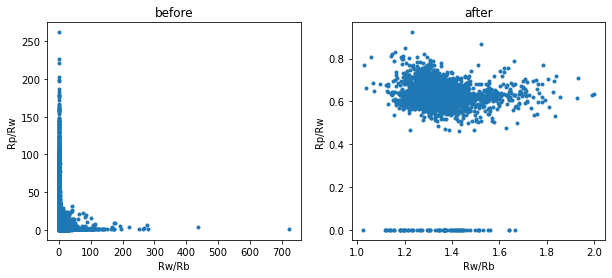

In [211]:
bef_files = "./test/before_ref/bef_scacor1_st_2385*.fit"
af_files = "../output_perspective/cor1_st_2385*.fits"

bef_files = sorted(glob.glob(bef_files))
af_files = sorted(glob.glob(af_files))

bef_ref, af_ref = R_pwb(bef_files, af_files)
for i in range(4):
    print(bef_ref[i].shape)
    fits.writeto(f"bef_ref{i}.fits", bef_ref[i], overwrite = True)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].scatter(bef_ref[2]/bef_ref[0], bef_ref[3]/bef_ref[2], marker = ".", label = "before")
axes[1].scatter(af_ref[2]/af_ref[0], af_ref[3]/af_ref[2], marker = ".", label = "after")

axes[0].set_title('before')
axes[1].set_title('after')
axes[0].set_xlabel('Rw/Rb')
axes[0].set_ylabel('Rp/Rw')
axes[1].set_xlabel('Rw/Rb')
axes[1].set_ylabel('Rp/Rw')
# axes[0].set_xlim(1.25,1.45)
# axes[1].set_xlim(1.25,1.45)
# axes[0].set_ylim(0.75,0.95)
# axes[1].set_ylim(0.75,0.95)
plt.show()

['../output_perspective/bef_scacor1_st_2385559680_b_reg_.fits', '../output_perspective/bef_scacor1_st_2385578902_v_reg_.fits', '../output_perspective/bef_scacor1_st_2385598109_w_reg_.fits', '../output_perspective/bef_scacor1_st_2385655809_p_reg_.fits']
(700, 700)
(700, 700)
(700, 700)
(700, 700)
[0.131, 0.087, 0.0655, 0.174]
(700, 700)
(700, 700)
(700, 700)
(700, 700)


<ipython-input-191-8f28d44074ca>:25: RuntimeWarning: divide by zero encountered in true_divide
  bef_ref.append(((bef_data[i] /t[i]) / bef_base) * scale_factor[i] )
<ipython-input-191-8f28d44074ca>:25: RuntimeWarning: invalid value encountered in true_divide
  bef_ref.append(((bef_data[i] /t[i]) / bef_base) * scale_factor[i] )
<ipython-input-191-8f28d44074ca>:26: RuntimeWarning: divide by zero encountered in true_divide
  af_ref.append(((af_data[i] /t[i]) / af_base) * scale_factor[i] )
<ipython-input-191-8f28d44074ca>:26: RuntimeWarning: invalid value encountered in true_divide
  af_ref.append(((af_data[i] /t[i]) / af_base) * scale_factor[i] )
<ipython-input-210-e3e8e0c361e2>:14: RuntimeWarning: divide by zero encountered in true_divide
  axes[0].scatter(bef_ref[2]/bef_ref[0], bef_ref[3]/bef_ref[2], marker = ".", label = "before")
<ipython-input-210-e3e8e0c361e2>:14: RuntimeWarning: invalid value encountered in true_divide
  axes[0].scatter(bef_ref[2]/bef_ref[0], bef_ref[3]/bef_ref[2],

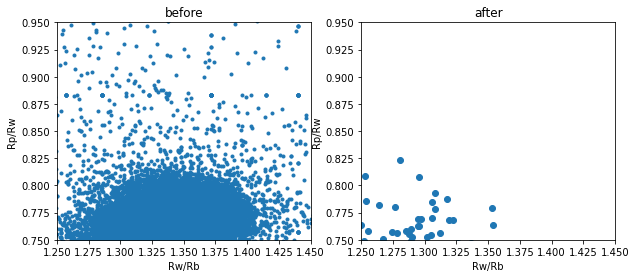

In [210]:
bef_files = "../output_perspective/bef_scacor1_st_2385*.fits"
af_files = "../output_perspective/cor1_st_2385*.fits"

bef_files = sorted(glob.glob(bef_files))
af_files = sorted(glob.glob(af_files))
print(bef_files)
for i in range(4):
    print(bef_ref[i].shape)
    fits.writeto(f"bef_ref{i}_reg.fits", bef_ref[i],overwrite=True)
bef_ref, af_ref = R_pwb(bef_files, af_files)
for i in range(4):
    print(bef_ref[i].shape)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].scatter(bef_ref[2]/bef_ref[0], bef_ref[3]/bef_ref[2], marker = ".", label = "before")
axes[1].scatter(af_ref[2]/af_ref[0], af_ref[3]/af_ref[2], marker = "o", label = "after")

axes[0].set_title('before')
axes[1].set_title('after')
axes[0].set_xlabel('Rw/Rb')
axes[0].set_ylabel('Rp/Rw')
axes[1].set_xlabel('Rw/Rb')
axes[1].set_ylabel('Rp/Rw')
axes[0].set_xlim(1.25,1.45)
axes[1].set_xlim(1.25,1.45)
axes[0].set_ylim(0.75,0.95)
axes[1].set_ylim(0.75,0.95)
plt.show()

In [ ]:
#ishiguro2014
target_files1 = "../output_perspective/_24505*.fits"
target_files2 = "../output_perspective/_24508*.fits"
target_files3 = "../output_perspective/_24510*.fits"
target_files4 = "../output_perspective/_24515*.fits"

In [218]:
image_files1 = sorted(glob.glob(target_files1))
image_files2 = sorted(glob.glob(target_files2))
image_files3 = sorted(glob.glob(target_files3))
image_files4 = sorted(glob.glob(target_files4))
l1 = []
l2 = []
l3 = []
l4 = []
# l1 = conversion_ref(bef_files)


236.19061279296875
237.7869873046875
318.233642578125
318.38421630859375
[0.131, 0.087, 0.0655, 0.174]
204.0645751953125
204.215576171875
276.5479736328125
267.107666015625
[0.131, 0.087, 0.0655, 0.174]
285.22528076171875
276.43255615234375
371.42303466796875
364.9852294921875
[0.131, 0.087, 0.0655, 0.174]
233.306396484375
230.86383056640625
308.94287109375
307.39794921875
[0.131, 0.087, 0.0655, 0.174]


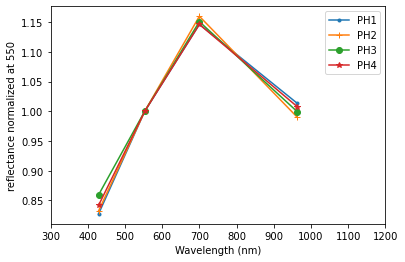

In [221]:
l1 = conversion_ref(image_files1)
l2 = conversion_ref(image_files2)
l3 = conversion_ref(image_files3)
l4 = conversion_ref(image_files4)
wave_length = [429, 553, 700, 963]
plt.plot(wave_length, l1, marker = ".", label = "PH1")
plt.plot(wave_length, l2, marker = "+", label = "PH2")
plt.plot(wave_length, l3, marker = "o", label = "PH3")
plt.plot(wave_length, l4, marker = "*", label = "PH4")
plt.xlabel('Wavelength (nm)')
plt.xlim(300, 1200)
plt.ylabel('reflectance normalized at 550')
plt.legend(loc = 'upper right') 
plt.show()

In [34]:
image_files
df_b = pd.DataFrame(fits.getdata(image_files[0]))
df_v = pd.DataFrame(fits.getdata(image_files[1]))
df_w = pd.DataFrame(fits.getdata(image_files[2]))
df_p = pd.DataFrame(fits.getdata(image_files[3]))


In [232]:
def conversion_ref_coord(image_filelist, x, y):
    result = []
    data = []
    t = []
    scale_factor = [1.254, 1, 0.645, 1.514]
    rad = 3.42 * pow(10,-3)
    for i, image_file in enumerate(image_filelist):
        hdu = fits.open(image_file)[0]
        header = hdu.header
        data.append(hdu.data)
        t.append(header["EXP_0"])
    base = (data[1][y][x] / t[1]) * rad
    for i in range(4):
        print(data[i][y][x])
        result.append(((data[i][y][x] / t[i]) / base) * rad * scale_factor[i]) 
        # result.append(((data[i][y][x] / t[i]) / base)  )
    print(t)
    return result

In [244]:
a = "../output_perspective/cor*.fits"
scattered = sorted(glob.glob(a))
b = "../output_perspective/bef_scacor*.fits"
flat = sorted(glob.glob(b))
c = "../output_perspective/_2489*.fits"
ori = sorted(glob.glob(c))


1829
1885
2487
2177
[0.131, 0.087, 0.0655, 0.174]
1894
1951
2592
2603
[0.131, 0.087, 0.0655, 0.174]
1880
1922
2569
2518
[0.131, 0.087, 0.0655, 0.174]


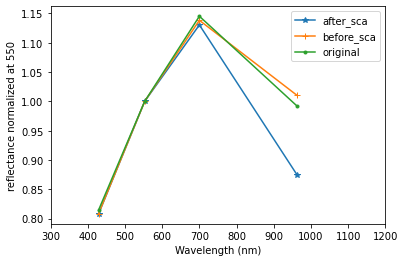

In [249]:
l1 = []
l2 = []
l3 = []
# l1 = conversion_ref_coord(scattered, 125, 133)   #bright area
# l2 = conversion_ref_coord(flat, 125, 133)
# l3 = conversion_ref_coord(ori, 125, 133)

l1 = conversion_ref_coord(scattered, 192, 124)     #smooth area
l2 = conversion_ref_coord(flat, 192, 124)
l3 = conversion_ref_coord(ori, 192, 124)

# l1 = conversion_ref(scattered)
# l2 = conversion_ref(flat)
# l3 = conversion_ref(ori)

plt.plot(wave_length, l1, marker = "*", label = "after_sca")
plt.plot(wave_length, l2, marker = "+", label = "before_sca")
plt.plot(wave_length, l3, marker = ".", label = "original")

plt.xlabel('Wavelength (nm)')
plt.xlim(300, 1200)
plt.ylabel('reflectance normalized at 550')
plt.legend(loc = 'upper right') 
plt.show()

3126
3025
3370
3241
[0.131, 0.087, 0.0655, 0.174]
711.4827423095703
712.3910064697266
943.2301177978516
866.3663787841797
[0.131, 0.087, 0.0655, 0.174]


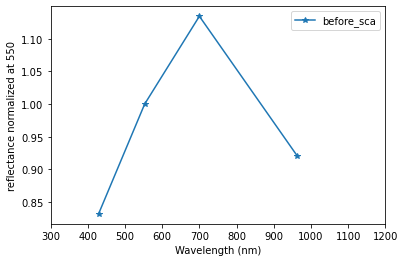

In [240]:
l = []
l = conversion_ref_coord(aa, 125, 133)
l2 = conversion_ref(aa)
plt.plot(wave_length, l2, marker = "*", label = "before_sca")
plt.xlabel('Wavelength (nm)')
plt.xlim(300, 1200)
plt.ylabel('reflectance normalized at 550')
plt.legend(loc = 'upper right') 
plt.show()

3128
3028
3382
3236
[0.131, 0.087, 0.0655, 0.174]
699.7815704345703
699.9080963134766
932.5677490234375
836.6720886230469
[0.131, 0.087, 0.0655, 0.174]


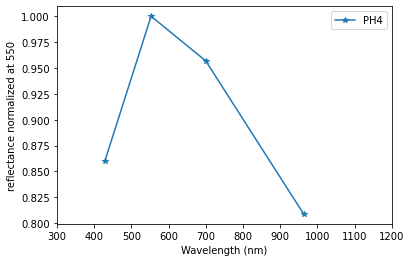

In [237]:
a = "../output_perspective/_2489*.fits"
aa = sorted(glob.glob(a))
l = []
l = conversion_ref_coord(aa, 125, 133)
l3 = conversion_ref(aa)
plt.plot(wave_length, l, marker = "*", label = "PH4")
plt.xlabel('Wavelength (nm)')
plt.xlim(300, 1200)
plt.ylabel('reflectance normalized at 550')
plt.legend(loc = 'upper right') 
plt.show()